<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Machine_Learning_Practice_Master/blob/main/proj_1_1(Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the name of GOD**

Mohammad Mahdi Shafighy

# 1. Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset:

In [9]:
file_path = "/content/housing.csv"
df = pd.read_csv(file_path)

# Display dataset overview

In [15]:
print("Dataset Loaded:")
df.info()
df.describe()
df.head()

Dataset Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


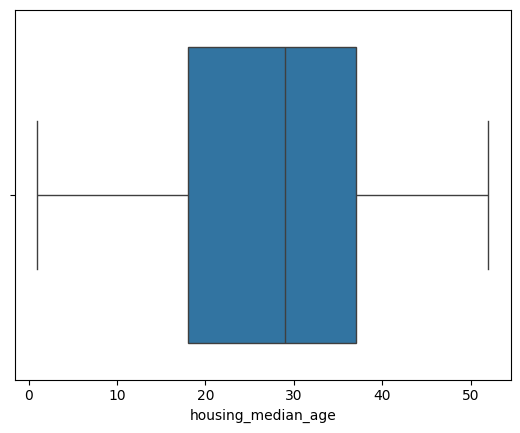

In [18]:
sns.boxplot(x=df['housing_median_age'])
plt.show()

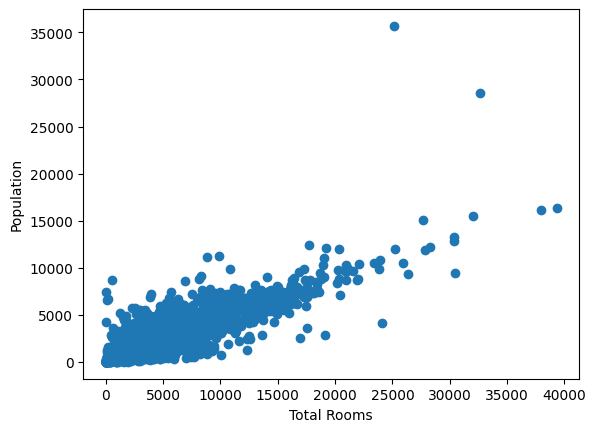

In [19]:
plt.scatter(df['total_rooms'], df['population'])
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.show()

# Data Pre Analysis

# ایجاد ماتریس پراکندگی و ضریب ھمبستگی


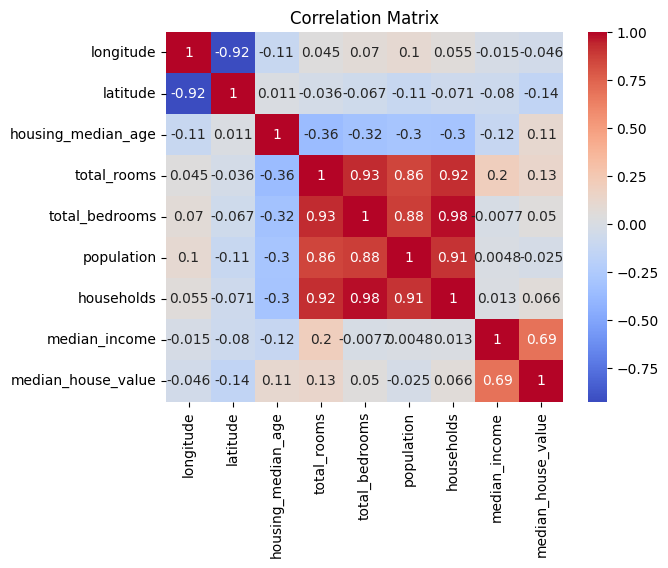

In [22]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 3. Data Preprocessing with pipeline :

In [24]:
# Check missing
numeric_cols = df.drop("median_house_value", axis=1).select_dtypes(include=['number']).columns
categorical_cols = df.drop("median_house_value", axis=1).select_dtypes(include=['object']).columns

# Preprocessing data : numerical
num_pipeline = make_pipeline(
    # Fill missing values with median
    SimpleImputer(strategy="median"),
    # Standard numerical feature
    StandardScaler()
)

# Preprocessing data : categorical
cat_pipeline = make_pipeline(
    # Fill missing values with mode
    SimpleImputer(strategy="most_frequent"),
    # Encode categorical features
    OneHotEncoder(handle_unknown="ignore")
)

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numeric_cols),
        ("cat", cat_pipeline, categorical_cols)
    ]
)

# Apply preprocessing pipeline
# Features
X = df.drop("median_house_value", axis=1)
# Target
y = df["median_house_value"]

X_prepared = preprocessor.fit_transform(X)

# 4. Model Training and Evaluation with MSE & R2_score:

In [14]:
# Split the data, training and testing
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

#Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with MSE & R2_Sco
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 4908476721.156616
R^2 Score: 0.6254240620553606


# تجزیه و تحلیل نتایج . 5


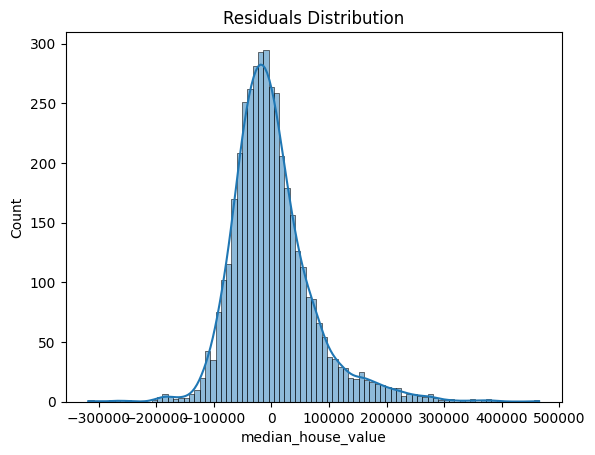

In [27]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [30]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}") # Added 4 spaces of indentation


Model Coefficients:
longitude: -53770.02948989966
latitude: -54397.869794480124
housing_median_age: 13871.277832304542
total_rooms: -13136.290361751537
total_bedrooms: 43107.99324277349
population: -43228.32336955287
households: 18448.01613063432
median_income: 74991.69860632032
ocean_proximity: -18926.582861952753
